# Dec, 10, 2021, Mayfield Tornado

The event that was chosen for this topic was the December 10th, 2021 tornado outbreak across the mid-south. This tornado outbreak was the largest outbreak for December (71) until later in the month when 121 tornadoes occurred. The hardest hit area was Mayfield, KY. This was a long track supercell which spanned over 165 miles. Most people thought this was going to be longer than the tri-state tornado in 1925, but the National Weather Service (NWS) survey found a brief lift in the tornado. This tornado was rated a high-end EF-4 (190 mph). In this Python case study, I look at the Mayfield, KY tornado and analyze the environment that was present using upper air soundings and looking at radar signatures. Figure 1 shows the study area outline. It shows the long track tornado as well as the town of Mayfield, KY. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs

import cartopy.feature as cfeat
from metpy import plots

In [2]:
#Creates boundaries for States
state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [3]:
#Projection used for states
proj = ccrs.Stereographic(central_longitude=-88, central_latitude=36.5)

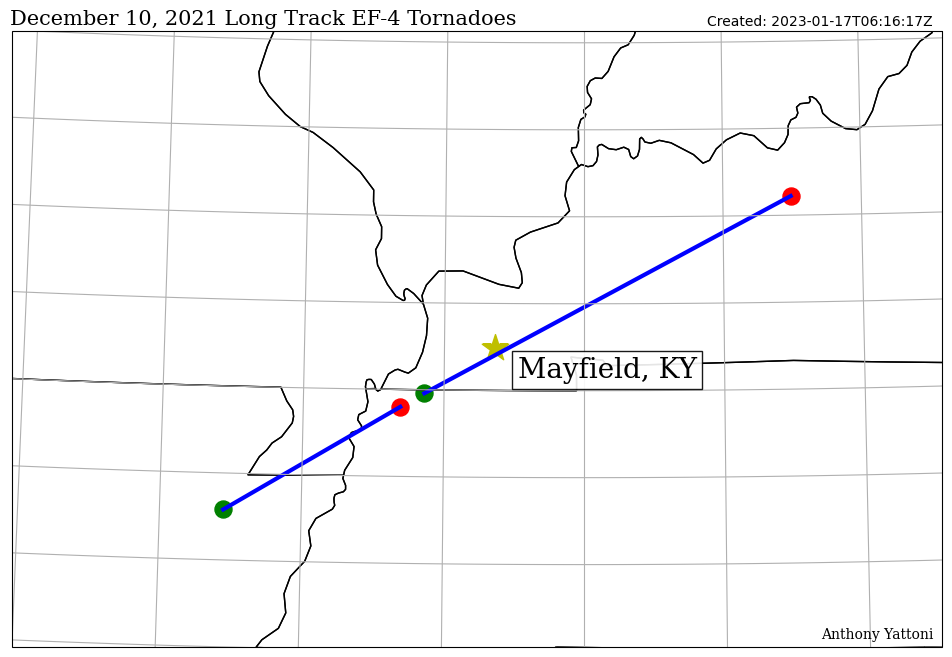

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
ax.gridlines()
ax.set_extent([-92, -85.5, 35, 38.5])

ax.scatter(-90.55, 35.79,  transform=ccrs.PlateCarree(), marker='o', s=150, c='g')
ax.scatter(-89.31, 36.40,  transform=ccrs.PlateCarree(), marker='o', s=150, c='r')

ax.scatter(-89.14, 36.48,  transform=ccrs.PlateCarree(), marker='o', s=150, c='g')
ax.scatter(-86.51, 37.61,  transform=ccrs.PlateCarree(), marker='o', s=150, c='r')
plots.add_timestamp(ax, y=1.01)

plt.text(0.93, 0.02, 'Anthony Yattoni', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, fontfamily = 'serif', fontsize=10)

ax.scatter(-88.6371, 36.741642,  transform=ccrs.PlateCarree(), marker='*', s=400, c='y')

plt.plot([-90.55, -89.31], [35.79, 36.40], linestyle='-',
         color='blue', linewidth=3,
         transform=ccrs.PlateCarree())

plt.plot([-89.14, -86.51], [36.48, 37.61], linestyle='-',
         color='blue', linewidth=3,
         transform=ccrs.PlateCarree())

plt.text(0.64, 0.45, 'Mayfield, KY',bbox=dict(facecolor='white', alpha=0.9), horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, fontfamily = 'serif', fontsize=20)

plt.text(0.27, 1.02, 'December 10, 2021 Long Track EF-4 Tornadoes', horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, fontfamily = 'serif', fontsize=15)


plt.savefig("Case Study Outline Area.jpg")

Figure 1: Study area for this project

I chose this tornado event for two reasons, the timing and the radar presentation. This storm occurred in the middle of December in Kentucky and most people, including me, thought that this not common. I want to credit the Storm Prediction Center (SPC) forecasters for placing a moderate risk out in the area the day of the storms. I think local people were not as tuned in to severe weather as Christmas was right around the corner. Once the public saw the radar images moving into Mayfield, they wished they would have been more aware. 

The warning forecasters at NWS Paducah could not have done a better job of warning people in their county warning area. They released a special weather statement that had wording of a supercell entering TN that could impact their counties in over an hour and specifically mentioned Mayfield. This supercell did exactly as what the forecaster said it would, it continued into Mayfield and had tornado emergencies every radar scan for over three hours. The Correlation Coefficient and Velocity scans were as strong as you will ever see. Which is a reason why I wanted to study this storm further. 

The geographic area of Mayfield, KY is unique that there are no upper air sites near it. The nearest one is Nashville, TN and other nearby stations are: Little Rock, AR, Lincoln, IL, and Springfield, MO. Upper air soundings allow a forecaster to see a vertical profile of the atmosphere. This includes the surface through the stratosphere until the balloon bursts and descends back to earth. These upper air balloons are launched twice a day and in December it is at 6 am and 6 pm. On severe weather days, the office may launch an additional balloon to see what the conditions are during that time. In this case, we have a special launch from Little Rock at 12 pm. Figures 1-3 will show the closest soundings. 

In Figure 2, the Little Rock 12Z (6 am) sounding shows an impressive environment set up for early morning. We can see that we have a cap (inversion) in place just under 850 mb and we are drier in the lower levels which is good. There is also a good amount of shear that is veering and increasing speed with height. 

In [5]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [6]:
dt = datetime(2021, 12, 10, 12)
station = 'LZK'

In [7]:
# Read remote sounding data based on time (dt) and station
df = WyomingUpperAir.request_data(dt, station)

# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

In [8]:
from metpy.units import units
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
height = df['height'].values * units(df.units['height'])

In [9]:
# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

In [10]:
p

Magnitude,[988.0 983.0 950.0 939.4 925.0 906.6 874.7 873.0 866.0 857.0 850.0 847.0 840.0 829.0 813.7 784.7 758.0 756.8 729.4 709.0 700.0 693.0 652.0 628.0 618.0 604.2 592.0 559.0 549.0 546.0 542.0 536.0 521.0 516.8 515.0 500.0 484.0 477.2 452.0 440.3 434.0 400.0 389.2 380.0 364.0 341.0 314.1 314.0 300.0 282.0 278.0 268.0 254.0 250.0 230.0 218.0 200.0 198.0 197.7 184.0 179.3 169.0 163.0 154.0 150.0 143.0 132.8 132.0 130.0 122.0 120.0 119.8 113.8 112.0 108.1 108.0 103.0 100.0 93.9 88.7 80.3 76.8 75.3 72.0 70.0 69.2 68.5 63.1 61.8 60.5 55.9 54.2 53.2 51.8 50.6 50.0 48.1 45.7 43.5 40.3 39.4 35.7 34.0 32.4 31.8 30.8 30.0 29.7 29.4 28.0 26.7 26.7 25.4 24.2 22.8 21.0 20.4 20.0 20.0 18.2 17.6 16.5 15.5 13.9 13.7 12.7 12.5 11.7 11.3 10.4 10.3 10.0 9.8 8.6 8.3]
Units,hectopascal


In [11]:
import numpy as np
import metpy.calc as mpcalc

In [12]:
#Calculates the LCL
mpcalc.lcl(p[0], T[0,], Td[0])

(983.6171566883818 <Unit('hectopascal')>,
 18.828872347552533 <Unit('degree_Celsius')>)

In [13]:
#Calculates the LFC
mpcalc.lfc(p, T, Td)

C:\Users\12178\anaconda3\lib\site-packages\metpy\calc\thermo.py:951: UserWarning: Duplicate pressure(s) [20.0 26.7] hPa provided. Output profile includes duplicate temperatures as a result.
  warnings.warn(f'Duplicate pressure(s) {unique[counts > 1]:~P} provided. '


(684.3762361710284 <Unit('hectopascal')>,
 4.69654510857436 <Unit('degree_Celsius')>)

In [14]:
#Calculates the EL
mpcalc.el(p, T, Td)

(269.0674363037559 <Unit('hectopascal')>,
 -44.72638878414906 <Unit('degree_Celsius')>)

In [15]:
#Calculates the Surface Based Cape_Cin
mpcalc.surface_based_cape_cin(p, T, Td)

(284.94983292491776 <Unit('joule / kilogram')>,
 -0.014519880453629314 <Unit('joule / kilogram')>)

In [16]:
#Calculates the Most Unstable Cape_Cin
mpcalc.most_unstable_cape_cin(p, T, Td)

(536.5426481970696 <Unit('joule / kilogram')>,
 -0.07329246768234733 <Unit('joule / kilogram')>)

In [17]:
#Calculates the Mixed Layer Cape_Cin
mpcalc.mixed_layer_cape_cin(p, T, Td)

(324.3636945010222 <Unit('joule / kilogram')>,
 -16.190365284562137 <Unit('joule / kilogram')>)

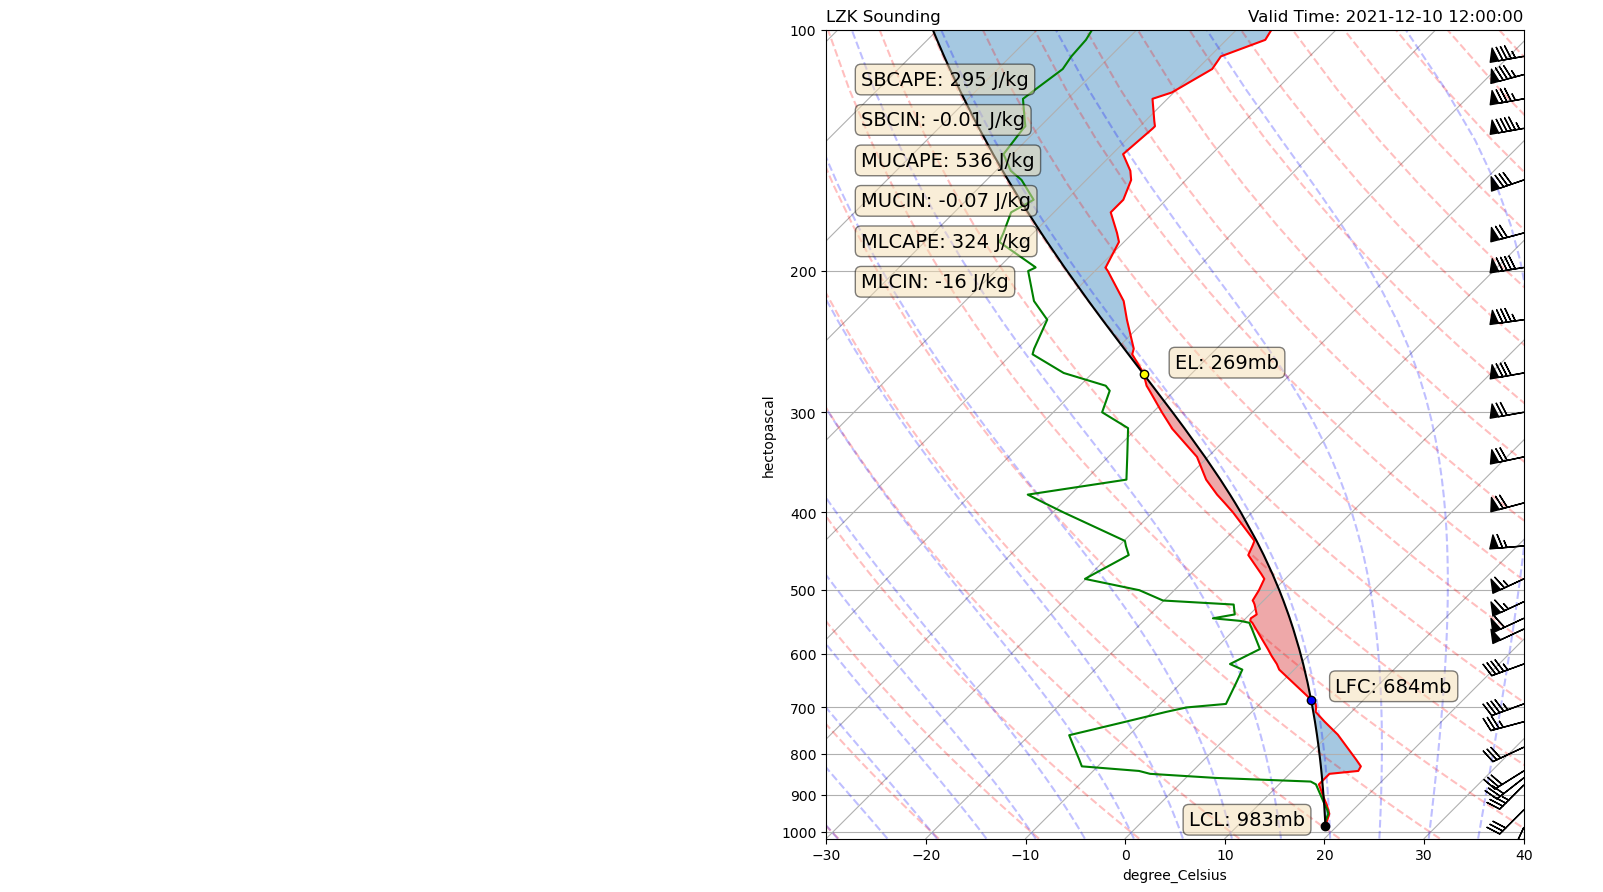

In [18]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.0)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines

parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])

parcel_path

skew.plot(p, parcel_path, color='k')

skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)

lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)
skew.plot(lfc_pressure, lfc_temperature, 'ko', markerfacecolor='blue')

el_pressure, el_temperature = mpcalc.el(p, T, Td)
skew.plot(el_pressure, el_temperature, 'ko', markerfacecolor='yellow')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
skew.ax.text(0.52, 0.035, 'LCL: 983mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.73, 0.2, 'LFC: 684mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.5, 0.6, 'EL: 269mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.95, 'SBCAPE: 295 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.90, 'SBCIN: -0.01 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.85, 'MUCAPE: 536 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.80, 'MUCIN: -0.07 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.75, 'MLCAPE: 324 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.70, 'MLCIN: -16 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')

plt.savefig("LZK 12Z Sounding.jpg")

plt.show()

Figure 2: Little Rock (LZK) 12Z Sounding

Things have rapidly changed in Figure 3. We see an increase in surface based CAPE (SBCAPE) in red which indicates the parcel is warmer than the environmental temperatue. The inversion that was once really strong is still there around 800 mb and is in blue which indicates the parcel is colder than the environmental temperature and will not rise. This sounding was around 12 pm and holds for a few more hours until the upper level ascent arrived and more heating caused the cap to disappear. 

In [19]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [20]:
dt = datetime(2021, 12, 10, 18)
station = 'LZK'

In [21]:
# Read remote sounding data based on time (dt) and station
df = WyomingUpperAir.request_data(dt, station)

# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

In [22]:
# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

In [23]:
p

Magnitude,[986.0 974.0 948.0 937.5 928.0 925.0 904.7 872.9 850.0 838.0 818.0 815.0 811.9 808.0 805.0 802.0 793.0 787.0 783.1 755.1 728.0 700.0 650.9 616.0 603.4 580.5 565.0 558.4 556.0 549.0 532.0 523.0 512.0 509.0 501.0 500.0 496.0 487.0 476.5 466.0 461.0 457.0 453.0 421.8 416.0 400.0 388.0 368.0 360.0 335.0 326.0 320.0 312.7 307.0 302.0 300.0 281.0 262.0 250.0 248.0 226.0 219.0 217.1 202.0 200.0 197.4 193.0 188.0 178.0 170.5 163.0 158.0 152.0 150.0 137.0 134.0 130.0 129.0 123.0 121.0 120.1 115.0 113.0 107.0 105.0 100.0 96.2 95.2 93.4 91.0 84.0 82.2 76.4 76.0 73.2 72.6 70.0 69.0 68.3 65.6 62.3 59.2 58.2 57.1 56.3 54.0 50.0 49.4 48.5 47.8 43.9 39.1 36.0 32.8 31.1 30.7 30.0 29.9 28.3 28.0 26.9 25.8 23.4 22.3 21.4 20.0 19.3 18.4 18.1 17.0 16.7 16.1 16.0 15.2 14.6 13.9 13.8 13.2 12.1 11.5 11.0 10.9 10.5 10.0 10.0 9.6 9.1 8.3 8.2 7.6 7.4]
Units,hectopascal


In [24]:
import numpy as np
import metpy.calc as mpcalc

In [25]:
#Calculates the LCL
mpcalc.lcl(p[0], T[0,], Td[0])

(928.4759590008947 <Unit('hectopascal')>,
 19.529861631381607 <Unit('degree_Celsius')>)

In [26]:
#Calculates the LFC
mpcalc.lfc(p, T, Td)

C:\Users\12178\anaconda3\lib\site-packages\metpy\calc\thermo.py:951: UserWarning: Duplicate pressure(s) [10.0] hPa provided. Output profile includes duplicate temperatures as a result.
  warnings.warn(f'Duplicate pressure(s) {unique[counts > 1]:~P} provided. '


(746.1778066650837 <Unit('hectopascal')>,
 11.554445065139138 <Unit('degree_Celsius')>)

In [27]:
#Calculates the EL
mpcalc.el(p, T, Td)

(192.4346148146115 <Unit('hectopascal')>,
 -58.27764606135264 <Unit('degree_Celsius')>)

In [28]:
#Calculates the Surface Based Cape_Cin
mpcalc.surface_based_cape_cin(p, T, Td)

(2324.794283840178 <Unit('joule / kilogram')>, 0 <Unit('joule / kilogram')>)

In [29]:
#Calculates the Most Unstable Cape_Cin
mpcalc.most_unstable_cape_cin(p, T, Td)

(2324.794283840178 <Unit('joule / kilogram')>, 0 <Unit('joule / kilogram')>)

In [30]:
#Calculates the Mixed Layer Cape_Cin
mpcalc.mixed_layer_cape_cin(p, T, Td)

(537.9490088887038 <Unit('joule / kilogram')>,
 -12.762096705081794 <Unit('joule / kilogram')>)

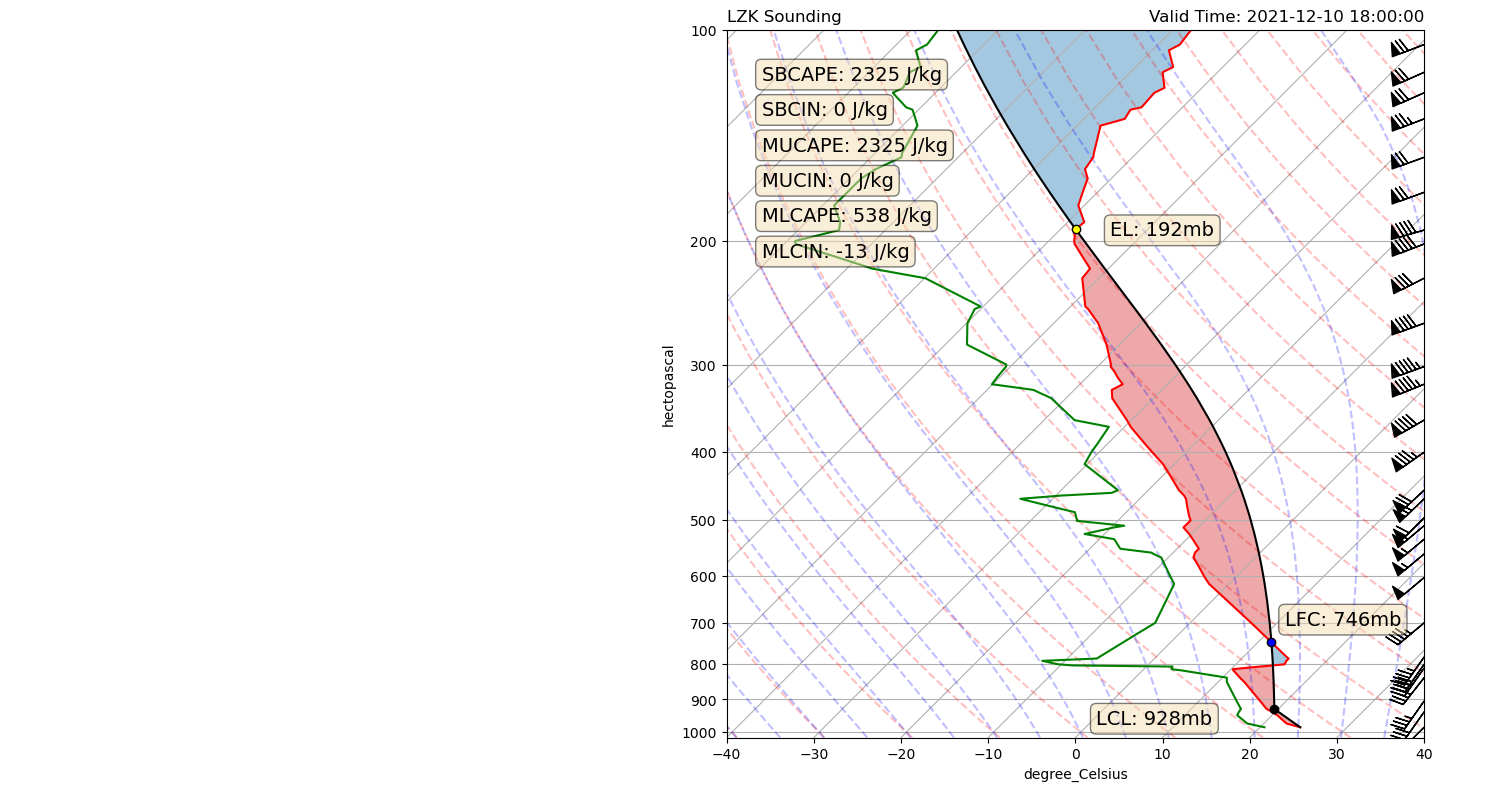

In [31]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-40, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines

parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])

parcel_path

skew.plot(p, parcel_path, color='k')

skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)

lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)
skew.plot(lfc_pressure, lfc_temperature, 'ko', markerfacecolor='blue')

el_pressure, el_temperature = mpcalc.el(p, T, Td)
skew.plot(el_pressure, el_temperature, 'ko', markerfacecolor='yellow')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
skew.ax.text(0.53, 0.04, 'LCL: 928mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.8, 0.18, 'LFC: 746mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.55, 0.73, 'EL: 192mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.95, 'SBCAPE: 2325 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.90, 'SBCIN: 0 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.85, 'MUCAPE: 2325 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.80, 'MUCIN: 0 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.75, 'MLCAPE: 538 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.70, 'MLCIN: -13 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')

plt.savefig('LZK 18Z Sounding.jpg')

plt.show()

Figure 3: Little Rock (LZK) 18Z Sounding

The 00Z sounding from Nashville which was launched at 6pm on December 10, shows the system has moved through the area. The parcel is stable through the vertical profile of the atmosphere. It does not looked mixed out, but will take a lot of upper level ascent to create lift for storms to occur in this environment as seen in Figure 4.

In [32]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [33]:
dt = datetime(2021, 12, 11, 0)
station = 'BNA'

In [34]:
# Read remote sounding data based on time (dt) and station
df = WyomingUpperAir.request_data(dt, station)

# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

In [35]:
# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

In [36]:
p

Magnitude,[989.0 942.0 940.3 925.0 907.3 901.0 884.0 875.5 850.0 833.0 814.5 807.0 785.3 783.0 780.0 776.0 773.0 765.0 757.2 754.0 733.0 730.0 700.0 653.0 652.7 639.0 620.0 604.7 583.0 581.9 576.0 563.0 559.7 556.0 544.0 533.0 528.0 510.0 500.0 497.0 479.0 477.9 470.0 465.0 460.0 452.0 448.0 445.0 441.0 437.0 428.0 425.0 420.0 410.0 400.0 389.5 353.0 347.0 344.0 340.0 332.0 328.0 325.0 314.0 313.7 300.0 299.0 288.0 277.0 262.2 261.0 258.0 250.0 247.0 231.0 225.0 217.4 217.0 208.0 200.0 195.0 170.2 160.0 150.0 135.0 133.0 131.0 127.0 119.8 116.0 113.0 109.0 104.0 100.0 99.7 98.4 97.9 96.7 94.7 88.5 80.0 76.1 72.4 71.5 70.0 68.8 67.6 65.4 62.2 59.1 57.2 56.1 54.8 53.4 51.8 50.7 50.3 50.0 46.4 45.9 44.4 43.7 40.7 39.5 37.6 37.6 34.7 34.0 33.3 30.6 30.0 27.0 26.8 24.2 23.2 22.1 21.6 21.0 20.4 20.0 19.1 18.2 17.4 16.6 16.2 15.1 14.4 13.6 13.1 12.2 11.9 10.8 10.7 10.3 10.0 9.8 8.9 8.8 7.7 7.1 7.0 6.6 6.5 6.2 5.9 5.5 5.4 5.4 5.0 4.2 4.1 4.0]
Units,hectopascal


In [37]:
import numpy as np
import metpy.calc as mpcalc

In [38]:
#Calculates the LCL
mpcalc.lcl(p[0], T[0,], Td[0])

(964.3146668937927 <Unit('hectopascal')>,
 16.103477133846752 <Unit('degree_Celsius')>)

In [39]:
#Calculates the LFC
mpcalc.lfc(p, T, Td)

C:\Users\12178\anaconda3\lib\site-packages\metpy\calc\thermo.py:951: UserWarning: Duplicate pressure(s) [5.4 37.6] hPa provided. Output profile includes duplicate temperatures as a result.
  warnings.warn(f'Duplicate pressure(s) {unique[counts > 1]:~P} provided. '


(nan <Unit('hectopascal')>, nan <Unit('degree_Celsius')>)

In [40]:
#Calculates the EL
mpcalc.el(p, T, Td)

(nan <Unit('hectopascal')>, nan <Unit('degree_Celsius')>)

In [41]:
#Calculates the Surface Based Cape_Cin
mpcalc.surface_based_cape_cin(p, T, Td)

(0 <Unit('joule / kilogram')>, 0 <Unit('joule / kilogram')>)

In [42]:
#Calculates the Most Unstable Cape_Cin
mpcalc.most_unstable_cape_cin(p, T, Td)

(358.1077077014205 <Unit('joule / kilogram')>,
 -25.85264295031551 <Unit('joule / kilogram')>)

In [43]:
#Calculates the Mixed Layer Cape_Cin
mpcalc.mixed_layer_cape_cin(p, T, Td)

(125.53487236686605 <Unit('joule / kilogram')>,
 -261.56101590746385 <Unit('joule / kilogram')>)

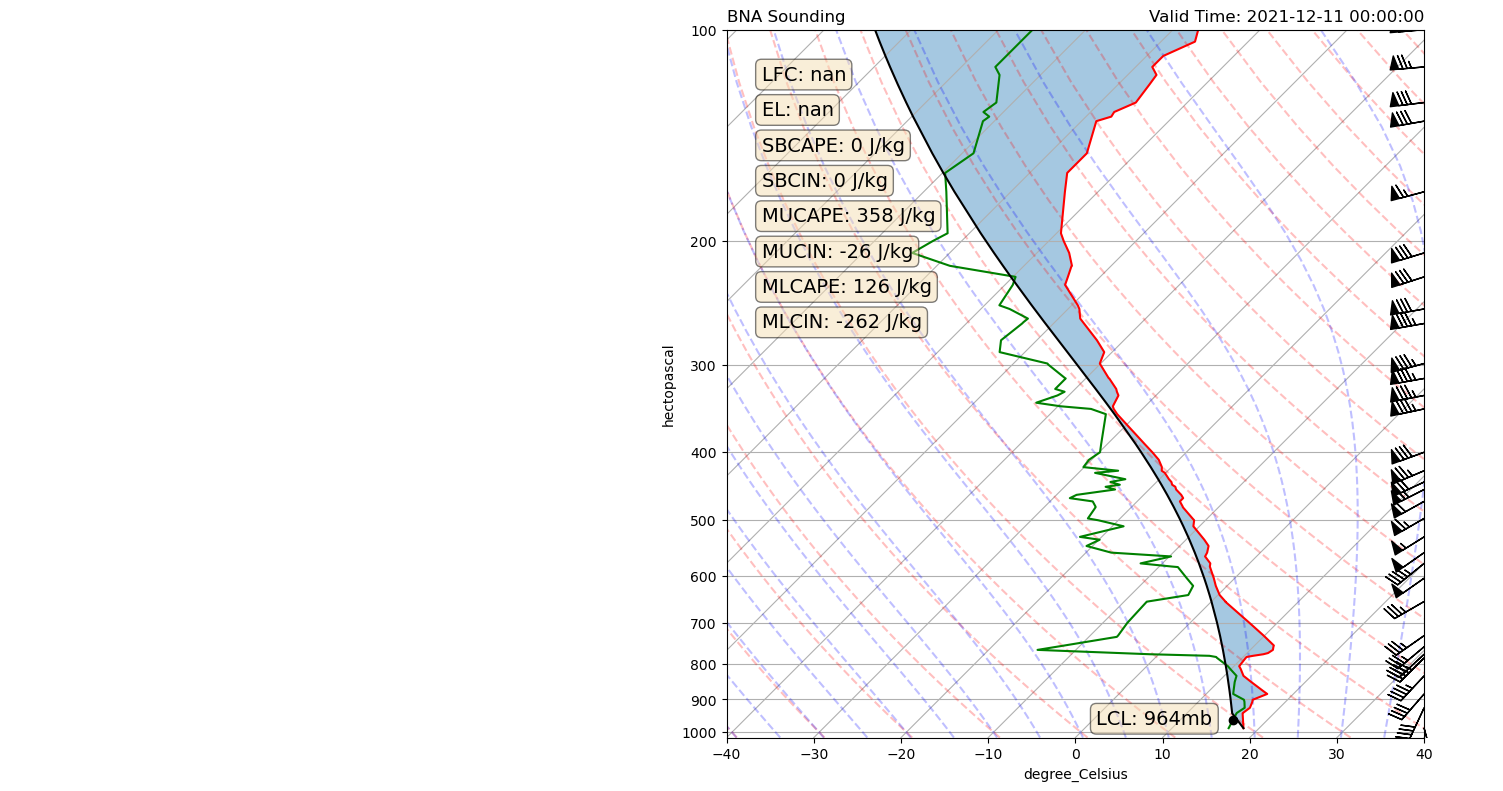

In [44]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-40, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines

parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])

parcel_path

skew.plot(p, parcel_path, color='k')

skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)

lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)
skew.plot(lfc_pressure, lfc_temperature, 'ko', markerfacecolor='blue')

el_pressure, el_temperature = mpcalc.el(p, T, Td)
skew.plot(el_pressure, el_temperature, 'ko', markerfacecolor='yellow')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
skew.ax.text(0.53, 0.04, 'LCL: 964mb', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.95, 'LFC: nan', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.90, 'EL: nan', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.85, 'SBCAPE: 0 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.80, 'SBCIN: 0 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.75, 'MUCAPE: 358 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.70, 'MUCIN: -26 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.65, 'MLCAPE: 126 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

skew.ax.text(0.05, 0.60, 'MLCIN: -262 J/kg', transform=skew.ax.transAxes,
             fontsize=14, verticalalignment='top', bbox=props)

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')

plt.savefig('BNA 00Z Sounding.jpg')

plt.show()

Figure 4: Nashville (BNA) 00Z Sounding

The radar scans for this event were incredible. One lone supercell moved through the area. Mayfield was impacted around 9:26 pm. There were two radar scans that impacted the town. The scan before the town was hit and the scan after the town was hit. Figure 4 and 5 display the images and what the impacts were. In these radar images, we have reflectivity (basic radar image), Correlation Coefficient (amount of debris in the air), Differential Reflectivity (compares vertical to horizontal reflecticvity), and velocity (wind direction/speed). One caveat to these radar images is the velocity image. I had to use a different sweep time and I believe that is why the scan is not in sync with the other three. 

In Figure 5, we can see the storm at 9:23 pm before it hits Mayfield. I will circle the area of interest. The top left image we can see the debris ball and where the tornado is. The top right we can see where the debris is being lifted. Here we have a lower CC value which indicates the radar is picking up large objects in the air. The bottom left is the ZdR which does not pick up a lot in this case. The bottom right, shows the velocity. The negative values in velcoity are going towards the radar and the postive values are going away. Where these two are coming together, and touching, we know there is strong rotation. 

# Plotting AWS-hosted NEXRAD Level 2 Data
Access NEXRAD radar data via Amazon Web Services and plot with MetPy

Accessing data remotely is a powerful tool for big data, such as NEXRAD radar data. By accessing it in the cloud, you can save time and space from downloading the data locally.

In [45]:
import boto3
import botocore
from botocore.client import Config
import matplotlib.pyplot as plt
from metpy.io import Level2File
from metpy.plots import add_timestamp, ctables
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from metpy.plots import colortables, USSTATES, USCOUNTIES
import cartopy.crs as ccrs

Access the data in the AWS cloud. For this study, we're plotting data
from the Paducah, KY radar.

In [46]:
s3 = boto3.resource('s3', config=Config(signature_version=botocore.UNSIGNED,
                                        user_agent_extra='Resource'))
bucket = s3.Bucket('noaa-nexrad-level2')
for obj in bucket.objects.filter(Prefix='2021/12/11/KPAH/KPAH20211211_032939_V06'):
    print(obj.key)

    # Use MetPy to read the file
    f = Level2File(obj.get()['Body'])

2021/12/11/KPAH/KPAH20211211_032939_V06


Subset Data
-----------

With the file comes a lot of data, including multiple elevations and products.
In the next block, we'll pull out the specific data we want to plot.


In [47]:
sweep = 0
# First item in ray is header, which has azimuth angle
az = np.array([ray[0].az_angle for ray in f.sweeps[sweep]])

ref_hdr = f.sweeps[sweep][0][4][b'REF'][0]
ref_range = np.arange(ref_hdr.num_gates) * ref_hdr.gate_width + ref_hdr.first_gate
ref = np.array([ray[4][b'REF'][1] for ray in f.sweeps[sweep]])

rho_hdr = f.sweeps[sweep][0][4][b'RHO'][0]
rho_range = (np.arange(rho_hdr.num_gates + 0) - 0.5) * rho_hdr.gate_width + rho_hdr.first_gate
rho = np.array([ray[4][b'RHO'][1] for ray in f.sweeps[sweep]])

zdr_hdr = f.sweeps[sweep][0][4][b'ZDR'][0]
zdr_range = (np.arange(zdr_hdr.num_gates + 0) - 0.5) * zdr_hdr.gate_width + zdr_hdr.first_gate
zdr = np.array([ray[4][b'ZDR'][1] for ray in f.sweeps[sweep]])

sweep = 1

vel_hdr = f.sweeps[sweep][0][4][b'VEL'][0]
vel_range = (np.arange(vel_hdr.num_gates + 0) - 0.5) * vel_hdr.gate_width + vel_hdr.first_gate
vel = np.array([ray[4][b'VEL'][1] for ray in f.sweeps[sweep]])

Plot the data
-------------

Use MetPy and Matplotlib to plot the data


In [48]:
import cartopy.feature as cfeat

state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')
proj = ccrs.Stereographic(central_longitude=-88, central_latitude=36.5)

C:\Users\12178\AppData\Local\Temp\ipykernel_9600\2082498178.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  a = ax.pcolormesh(xlocs, ylocs, data, cmap=colors, norm=norm)


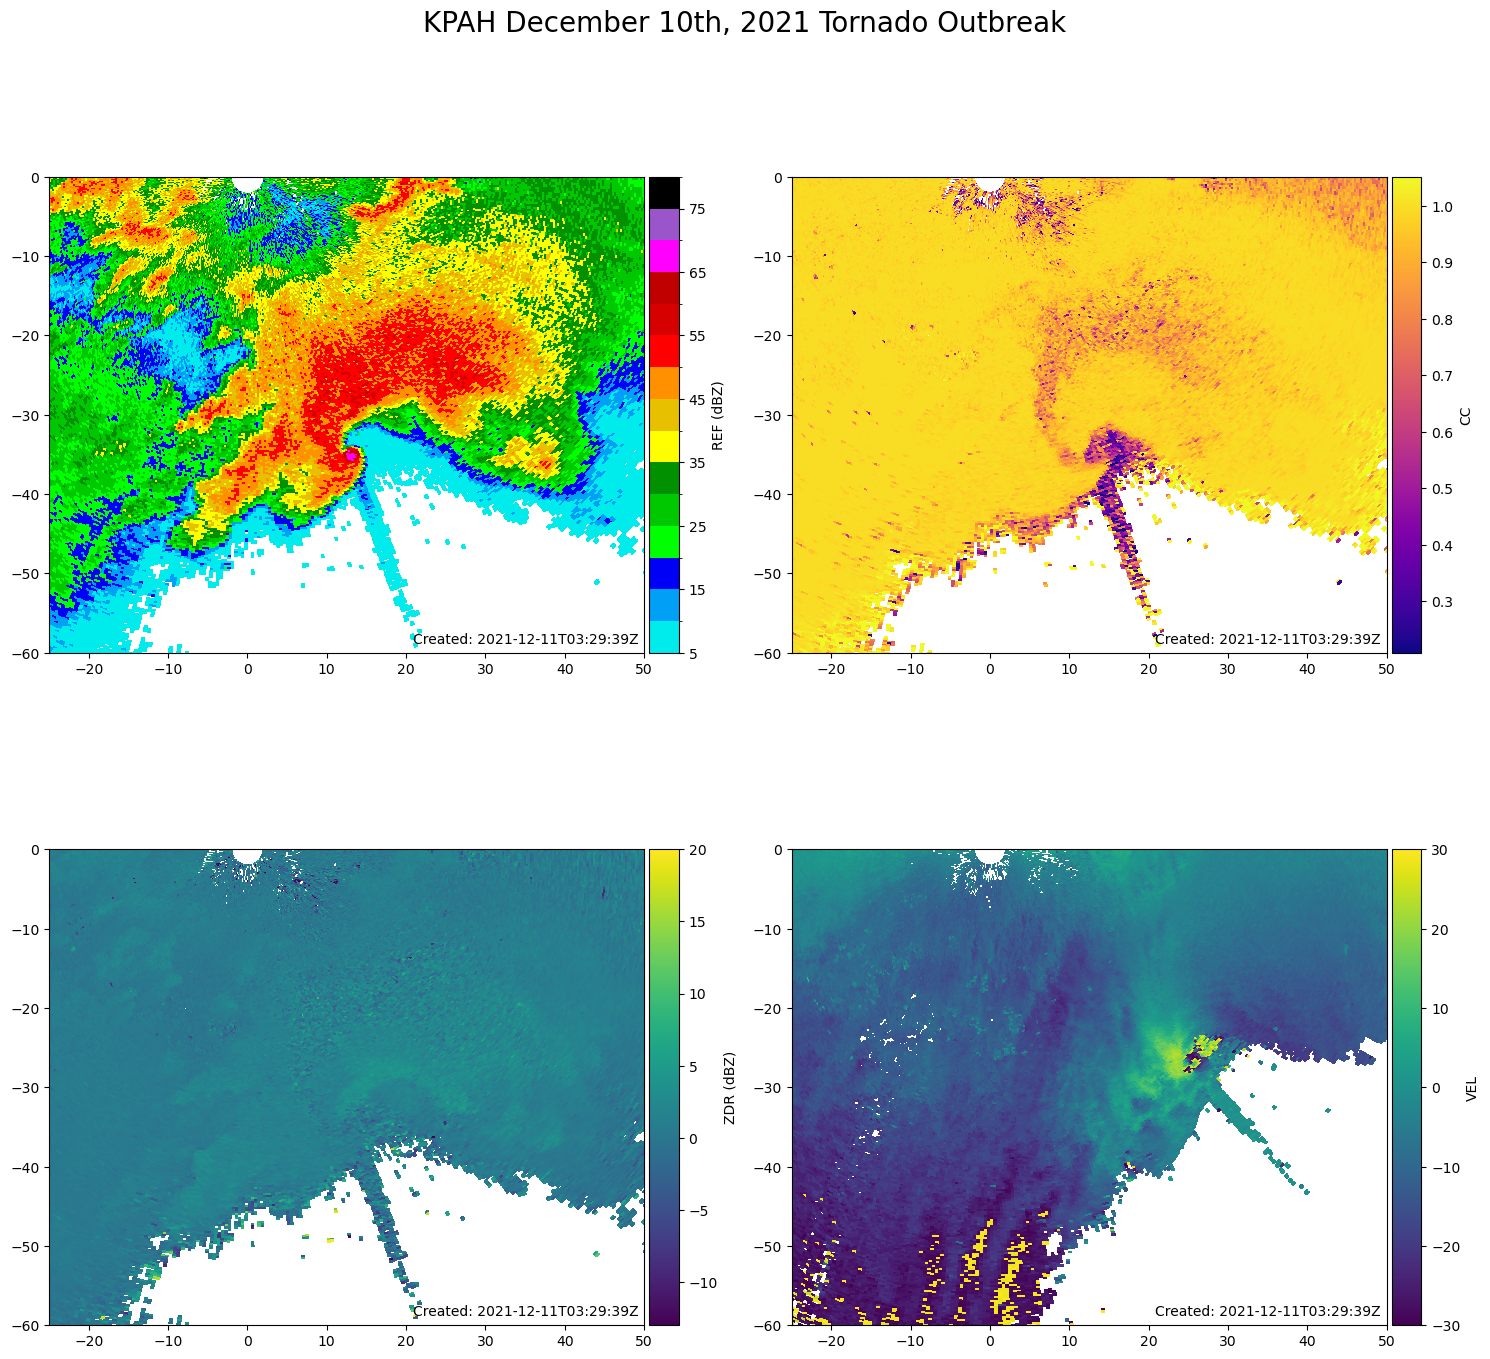

In [49]:
# Get the NWS reflectivity colortable from MetPy
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)


# Plot the data!
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for var_data, var_range, colors, lbl, ax in zip((ref, rho, zdr, vel),
                                                (ref_range, rho_range, zdr_range, vel_range),
                                                (ref_cmap, 'plasma', 'viridis', 'viridis'),
                                                ('REF (dBZ)', 'CC', 'ZDR (dBZ)', 'VEL'),
                                                axes.flatten()):
    
    # Turn into an array, then mask
    data = np.ma.array(var_data)
    data[np.isnan(data)] = np.ma.masked

    # Convert az,range to x,y
    xlocs = var_range * np.sin(np.deg2rad(az[:, np.newaxis]))
    ylocs = var_range * np.cos(np.deg2rad(az[:, np.newaxis]))

    # Define norm for reflectivity
    norm = ref_norm if colors == ref_cmap else None

    # Plot the data
    a = ax.pcolormesh(xlocs, ylocs, data, cmap=colors, norm=norm)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(a, cax=cax, orientation='vertical', label=lbl)

    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-25, 50)
    ax.set_ylim(-60, 0)
    add_timestamp(ax, f.dt, y=0.02, high_contrast=False)
plt.suptitle('KPAH December 10th, 2021 Tornado Outbreak', fontsize=20)
plt.tight_layout()
plt.show()

Figure 5: Radar Imagery from KPAH at 9:23 pm on December 10, 2021 before hitting Mayfield

Figure 6 displays the radar scans after the tornado went through the town of Mayfield. This is the most fascinating image to me. Allof the same things are occuring from the previous radar image but this time there is a Three Body Scatter Spike (TBSS). This usually occurs when large hail is present. The radar beam hits the hail aloft which is scattered down to the ground and then scattered back upward to be scattered again by the hail still falling. It appears as a “spike” coming out of the high dBz values. We can also see the increase in CC coverage as the tornado went through a residential area and picked up more debris to be lofted into the air. 

*In this next set of code, the only thing that changes is the object ID of the radar image*

In [50]:
import boto3
import botocore
from botocore.client import Config
import matplotlib.pyplot as plt
from metpy.io import Level2File
from metpy.plots import add_timestamp, ctables
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from metpy.plots import colortables, USSTATES, USCOUNTIES
import cartopy.crs as ccrs

In [51]:
s3 = boto3.resource('s3', config=Config(signature_version=botocore.UNSIGNED,
                                        user_agent_extra='Resource'))
bucket = s3.Bucket('noaa-nexrad-level2')
for obj in bucket.objects.filter(Prefix='2021/12/11/KPAH/KPAH20211211_032939_V06'):
    print(obj.key)

    # Use MetPy to read the file
    f = Level2File(obj.get()['Body'])

2021/12/11/KPAH/KPAH20211211_032939_V06


*If you compare the "for obj" line from above, you will see there is a different prefix ending which states the time of the radar scan. It is the next radar scan from the KPAH radar.*

In [52]:
sweep = 0
# First item in ray is header, which has azimuth angle
az = np.array([ray[0].az_angle for ray in f.sweeps[sweep]])

ref_hdr = f.sweeps[sweep][0][4][b'REF'][0]
ref_range = np.arange(ref_hdr.num_gates) * ref_hdr.gate_width + ref_hdr.first_gate
ref = np.array([ray[4][b'REF'][1] for ray in f.sweeps[sweep]])

rho_hdr = f.sweeps[sweep][0][4][b'RHO'][0]
rho_range = (np.arange(rho_hdr.num_gates + 0) - 0.5) * rho_hdr.gate_width + rho_hdr.first_gate
rho = np.array([ray[4][b'RHO'][1] for ray in f.sweeps[sweep]])

zdr_hdr = f.sweeps[sweep][0][4][b'ZDR'][0]
zdr_range = (np.arange(zdr_hdr.num_gates + 0) - 0.5) * zdr_hdr.gate_width + zdr_hdr.first_gate
zdr = np.array([ray[4][b'ZDR'][1] for ray in f.sweeps[sweep]])

sweep = 1

vel_hdr = f.sweeps[sweep][0][4][b'VEL'][0]
vel_range = (np.arange(vel_hdr.num_gates + 0) - 0.5) * vel_hdr.gate_width + vel_hdr.first_gate
vel = np.array([ray[4][b'VEL'][1] for ray in f.sweeps[sweep]])

In [53]:
import cartopy.feature as cfeat

state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')
proj = ccrs.Stereographic(central_longitude=-88, central_latitude=36.5)

C:\Users\12178\AppData\Local\Temp\ipykernel_9600\1770201159.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  a = ax.pcolormesh(xlocs, ylocs, data, cmap=colors, norm=norm)


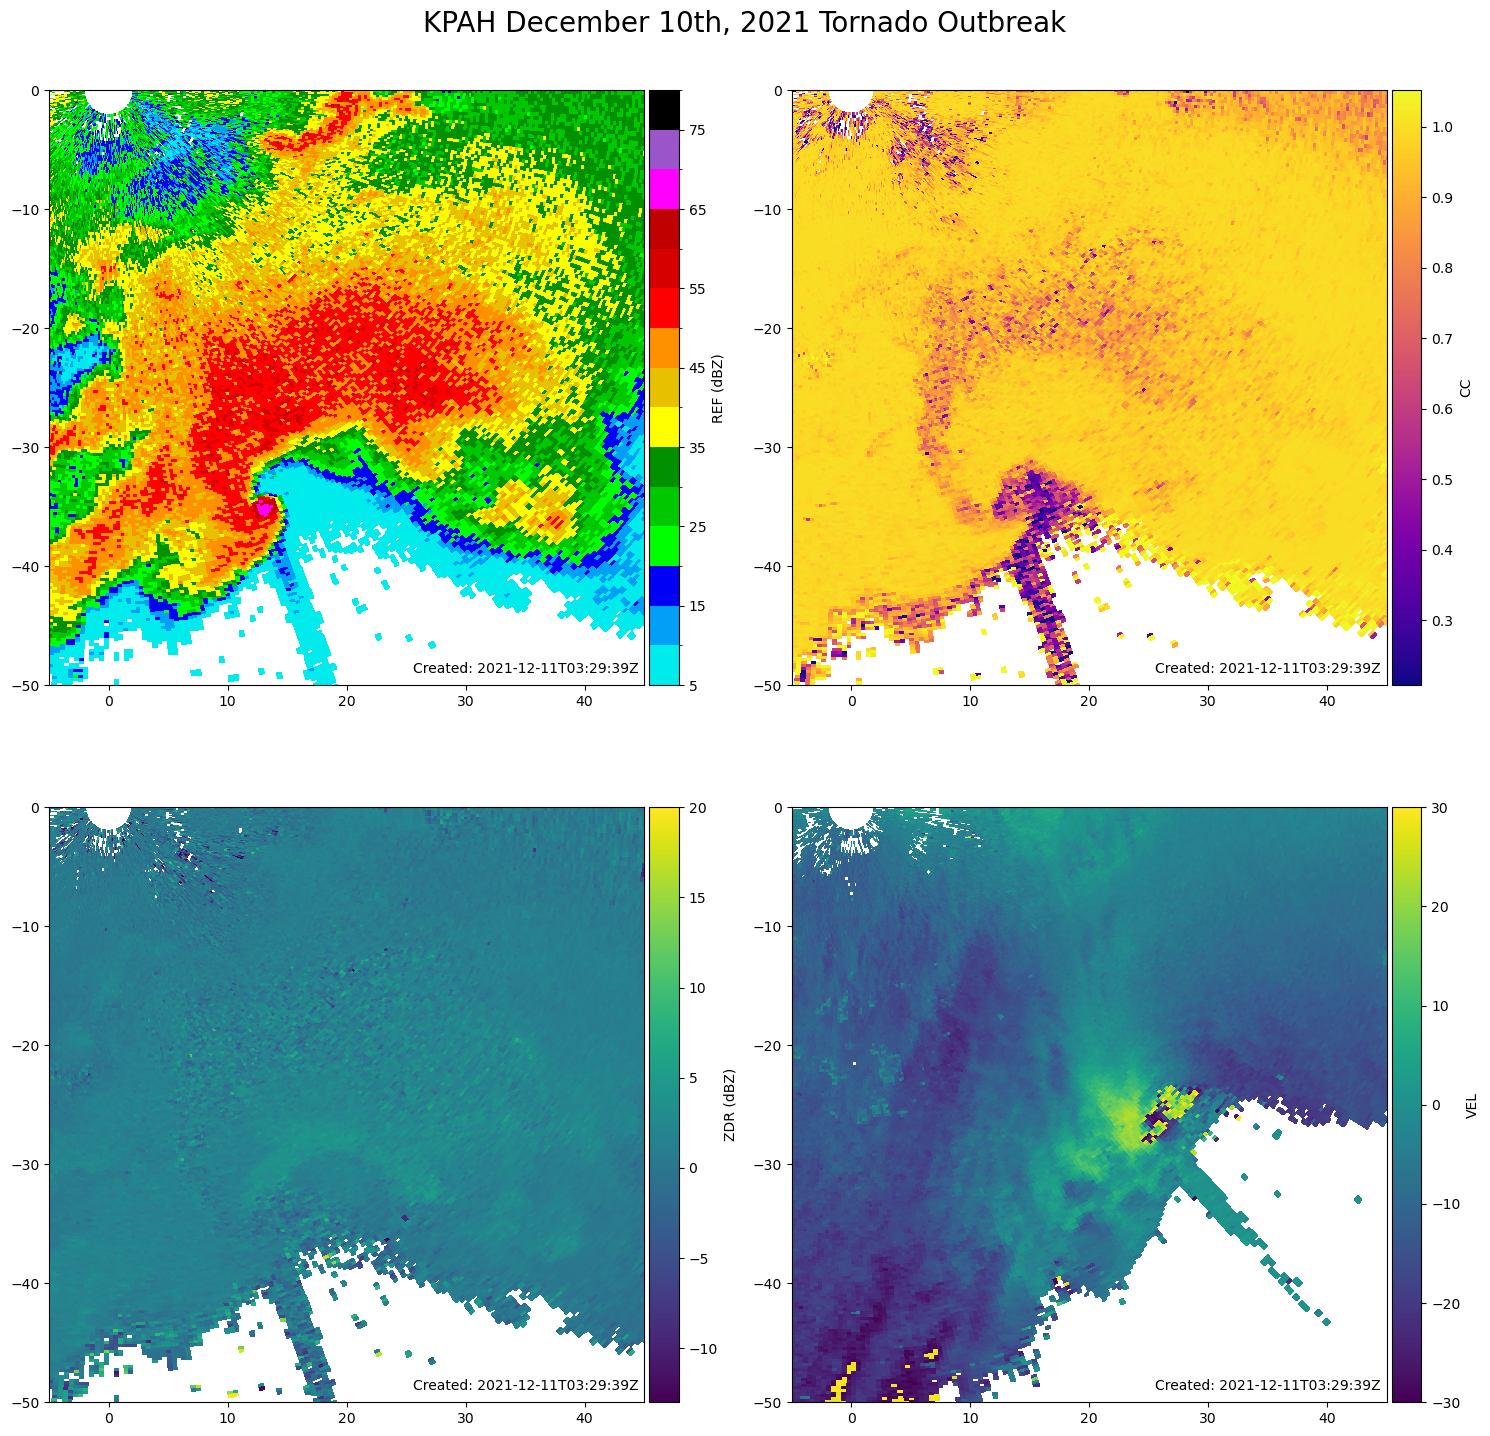

In [54]:
# Get the NWS reflectivity colortable from MetPy
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)


# Plot the data!
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.add_feature(state_borders, edgecolor='black')
ax.add_feature(cfeat.BORDERS)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for var_data, var_range, colors, lbl, ax in zip((ref, rho, zdr, vel),
                                                (ref_range, rho_range, zdr_range, vel_range),
                                                (ref_cmap, 'plasma', 'viridis', 'viridis'),
                                                ('REF (dBZ)', 'CC', 'ZDR (dBZ)', 'VEL'),
                                                axes.flatten()):
    
    # Turn into an array, then mask
    data = np.ma.array(var_data)
    data[np.isnan(data)] = np.ma.masked

    # Convert az,range to x,y
    xlocs = var_range * np.sin(np.deg2rad(az[:, np.newaxis]))
    ylocs = var_range * np.cos(np.deg2rad(az[:, np.newaxis]))

    # Define norm for reflectivity
    norm = ref_norm if colors == ref_cmap else None

    # Plot the data
    a = ax.pcolormesh(xlocs, ylocs, data, cmap=colors, norm=norm)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(a, cax=cax, orientation='vertical', label=lbl)

    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-5, 45)
    ax.set_ylim(-50, 0)
    add_timestamp(ax, f.dt, y=0.02, high_contrast=False)
plt.suptitle('KPAH December 10th, 2021 Tornado Outbreak', fontsize=20)
plt.tight_layout()
plt.show()

Figure 6: Radar Imagery from KPAH at 9:29 pm on December 10, 2021 after hitting Mayfield

In future studies, satellite imagery could be incorportated in events. This event would have been difficult to utilize since it was at night, but some products would be good to use. I also believe that more weather paramters could have been used. For instance an upper air analysis map that showed where the ascent would be and how strong it was. I think it would have been good to overlay some SPC products as well and maybe show the warning progression. I think mesoscale paramters cold be utilized as well to show helciity, CAPE, and lapse rates. 

The tornadic event on December 10, 2021 is an event that will never be forgotten by forecasters and the people of Mayfiled, KY. Upper air soundings were crucial in getting watches out in a timly manner that helped forecasters and emergency managers prepare for what could come. Radar imagery was used to protect lives that night. This was crucial in getting warnings sent out. 
This study improved my understanding of python and how to use it in a meteorological way. There are many tools available on the internet to learn python. The program that I used was provided through UNIDATA and was produced on Monday’s. The one thing that I did not like was the older versions are not updated when new python updates come out. So some of the work is depreciated and it makes it hard to keep up. 
